In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv('BlackF.csv')

In [50]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [14]:
df['Product_Category_2'].fillna(method='bfill',inplace=True)

In [17]:
df['Product_Category_3'].fillna(method='bfill',inplace=True)

In [18]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [19]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [20]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [21]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,6.0,14.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,6.0,14.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,14.0,14.0,7969


In [23]:
df=df[df['Purchase']<upper_limit]

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()
cat_cols=['Age','Gender','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [26]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
2,1000001,P00087842,0,0,10,0,2,0,5,4,10,1422
3,1000001,P00085442,0,0,10,0,2,0,5,12,10,1057
15,1000006,P00190242,0,5,9,0,1,0,1,3,10,2079
70,1000018,P00366542,0,1,3,1,3,0,2,13,13,1780
80,1000018,P0094142,0,1,3,1,3,0,1,3,2,697


In [27]:
X=df.drop(columns=['User_ID','Product_ID','Purchase'],axis=1)
Y=df['Purchase']

In [28]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
2,0,0,10,0,2,0,5,4,10
3,0,0,10,0,2,0,5,12,10
15,0,5,9,0,1,0,1,3,10
70,0,1,3,1,3,0,2,13,13
80,0,1,3,1,3,0,1,3,2


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [33]:
pred=reg.predict(X_test)

In [34]:
reg.coef_

array([  -8.50774067,   18.24124099,   -4.83838872,   -5.96319152,
          2.64776376,    2.73579639, -484.2173349 ,   61.41058201,
          4.99424031])

In [35]:
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score
r2_score(y_test,pred)

0.5464588836007179

In [36]:
rmse = mean_squared_error(y_test, pred, squared=False)

# Calculate R-squared
r2 = r2_score(y_test, pred)

# Calculate adjusted R-squared
adjusted_r2 = explained_variance_score(y_test, pred)

# Calculate MAE
mae = mean_squared_error(y_test, pred)

# Print the results
print("RMSE:", rmse)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)
print("MAE:", mae)

RMSE: 450.7708767649267
R-squared: 0.5464588836007179
Adjusted R-squared: 0.5464639786369054
MAE: 203194.38333942072


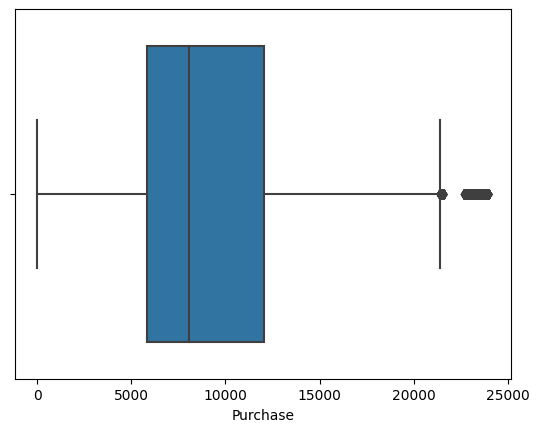

In [84]:
sns.boxplot(data=df,x='Purchase')
plt.show()

In [22]:
Q1=df.Purchase.quantile(0.25)
Q3=df.Purchase.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3-1.5*IQR

In [86]:
upper_limit

2707.5

In [87]:
lower_limit

-3523.5

In [92]:
df2=df[df['Purchase']<upper_limit]

In [89]:
df.Purchase.min()

12

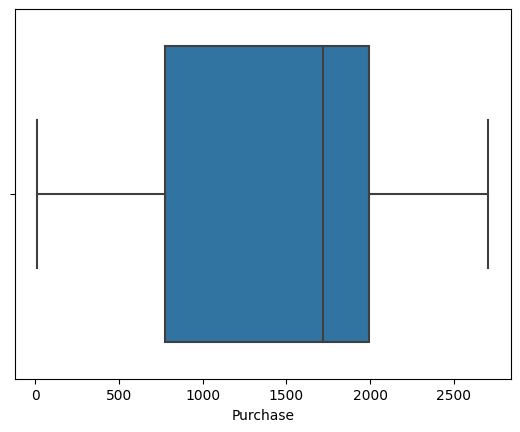

In [93]:
sns.boxplot(data=df2,x='Purchase')
plt.show()

In [55]:
df2=X.join(Y)

In [56]:
data=df2.corr()

<Axes: >

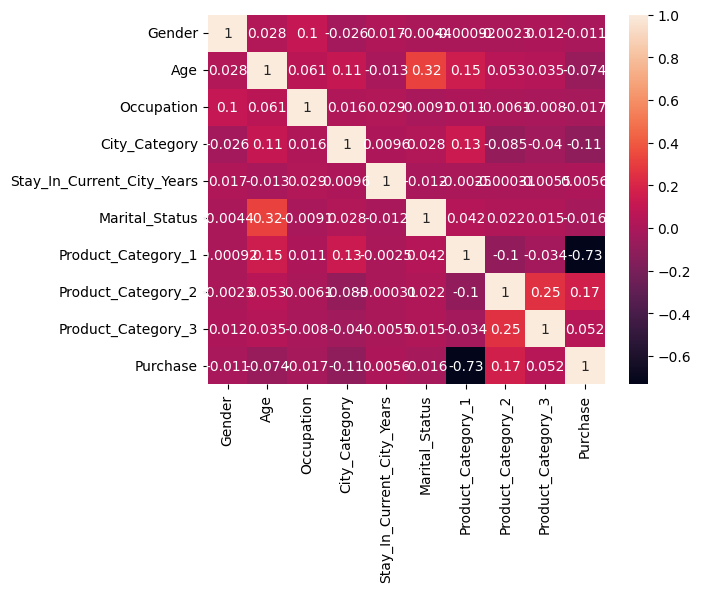

In [57]:
sns.heatmap(df2.corr(),annot=True)

In [58]:
data['Purchase'].sort_values(ascending=False)

Purchase                      1.000000
Product_Category_2            0.167836
Product_Category_3            0.052251
Stay_In_Current_City_Years    0.005597
Gender                       -0.010533
Marital_Status               -0.015825
Occupation                   -0.017151
Age                          -0.074325
City_Category                -0.107641
Product_Category_1           -0.731824
Name: Purchase, dtype: float64

In [75]:
#df2['Age']=df2['Age'].str.replace('+','')
df2=df2["Age"].astype(str)
df2["Age"].str.replace("+","") 

KeyError: 'Age'

In [62]:
df2['Age'].astpye(str)

AttributeError: 'Series' object has no attribute 'astpye'